In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set()

In [0]:
DATA_DIR = '/data/workspace_files/BTC and ETH Price Data'
COUNT_DIR = '/data/workspace_files/Tweet Counts'

### Additional Visualizations

This notebook contains additional visualizations used in the report. Please refer to the report for additional details and explanation.

In [2]:
data = pd.read_csv(os.path.join(DATA_DIR, 'price_return_vol_data.csv'),
                   index_col='Date', parse_dates=['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2039 entries, 2016-01-01 to 2021-07-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BTC Price         2039 non-null   float64
 1   BTC Return        2039 non-null   float64
 2   BTC Realized Vol  2038 non-null   float64
 3   ETH Price         2039 non-null   float64
 4   ETH Return        2039 non-null   float64
 5   ETH Realized Vol  1836 non-null   float64
dtypes: float64(6)
memory usage: 111.5 KB


In [3]:
btc_rv = np.sqrt((data['BTC Return'] ** 2).rolling(30).sum())
btc_rv = btc_rv * np.sqrt(12)
btc_rv.dropna(inplace=True)

In [4]:
min_date = btc_rv.index.min()
max_date = btc_rv.index.max()

vix = pd.read_csv(os.path.join(DATA_DIR, 'VIX_History.csv'),
                  index_col=0, parse_dates=['DATE'])
vix = vix.resample('D').interpolate(method='linear')
vix = vix.loc[(vix.index >= min_date) & (vix.index <= max_date), 'CLOSE']
vix = vix / 100

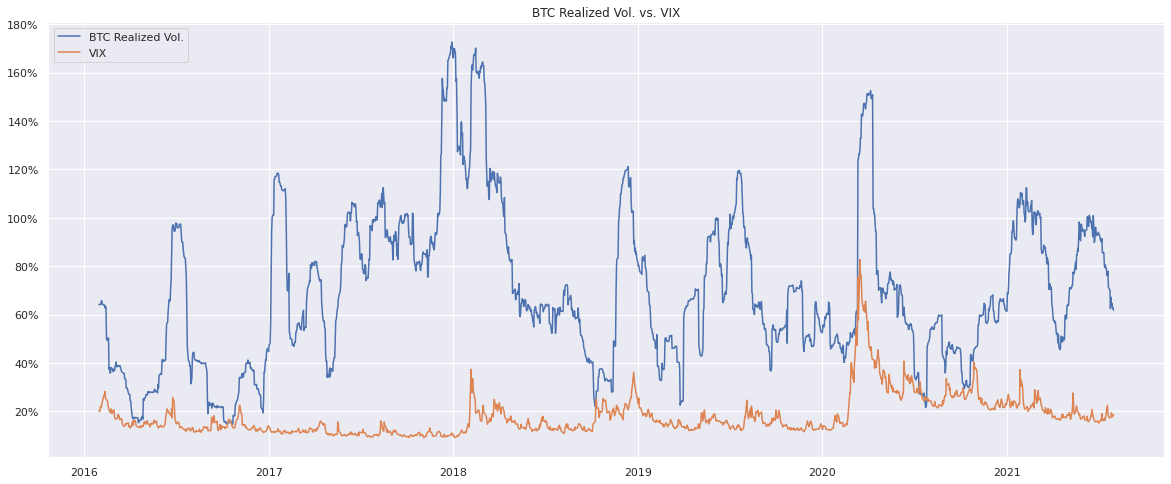

In [5]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(btc_rv, label='BTC Realized Vol.')
ax.plot(vix, label='VIX')
ax.legend(loc='upper left')
ax.set_title('BTC Realized Vol. vs. VIX')

# format the y-axis as a %
# https://stackoverflow.com/questions/31357611/format-y-axis-as-percent
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

fig.savefig('btc_vs_vix.png')
plt.show()

In [6]:
def get_count_data(file, min_date, max_date):
    """Helper function to load tweet count data."""
    df = pd.read_csv(file, index_col='start', parse_dates=['start'])
    df = df[(df.index >= min_date) & (df.index <= max_date)]

    return df.squeeze()

crypto_file = os.path.join(COUNT_DIR, 'crypto_tweets_counts.csv')
btc_file = os.path.join(COUNT_DIR, 'bitcoin_tweets_counts.csv')
eth_file = os.path.join(COUNT_DIR, 'ethereum_tweets_counts.csv')

crypto_tweets = get_count_data(crypto_file, min_date, max_date).sort_index()
btc_tweets = get_count_data(btc_file, min_date, max_date).sort_index()
eth_tweets = get_count_data(eth_file, min_date, max_date).sort_index()

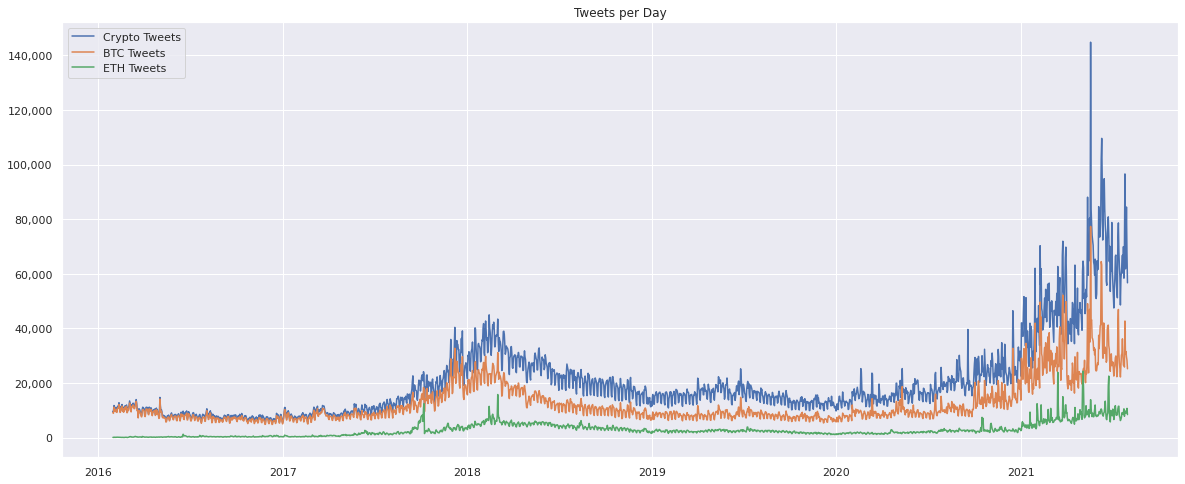

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(crypto_tweets, label='Crypto Tweets')
ax.plot(btc_tweets, label='BTC Tweets')
ax.plot(eth_tweets, label='ETH Tweets')
ax.legend(loc='upper left')
ax.set_title('Tweets per Day')

# format the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}'.format(y))) 

fig.savefig('tweet_counts.png')
plt.show()

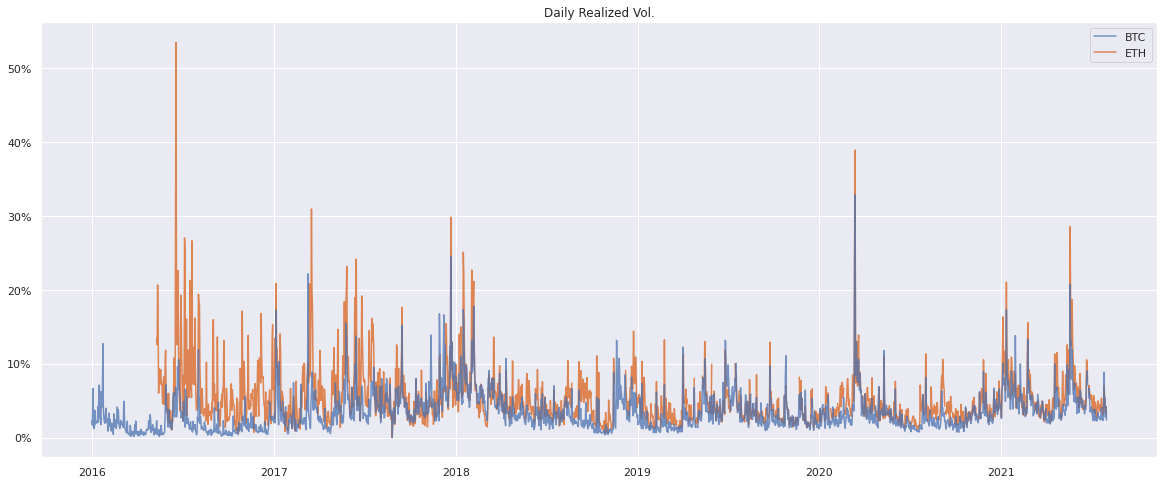

In [8]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(data['BTC Realized Vol'], label='BTC', alpha=0.75, zorder=2)
ax.plot(data['ETH Realized Vol'], label='ETH', alpha=1.0, zorder=1)
ax.legend(loc='upper right')
ax.set_title('Daily Realized Vol.')

# format the y-axis as a %
# https://stackoverflow.com/questions/31357611/format-y-axis-as-percent
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

fig.savefig('btc_eth_vol.png')
plt.show()